# Amorphous graphite: Mancini data

In [1]:
import galpynostatic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Cargamos los datos de Mancini:

In [2]:
df = pd.read_csv("data/mancini.csv")

En este caso no es necesario hacer el preprocesamiento de datos ya que tenemos las capacidades de descara y las C-rates definidas en este único archivo (sólo las `xmaxs` están entre 0 y 100 así que las normalizamos para que estén entre 0 y 1)

In [3]:
crates = np.asarray(df["crates"]).reshape(-1, 1)
xmaxs = np.asarray(df["xmaxs"]) / 100.0

El otro dato del trabajo es que el radio de la nanopartícula es de $7.5 \mu m$

In [4]:
d = 0.00075

Visualizamos estos datos

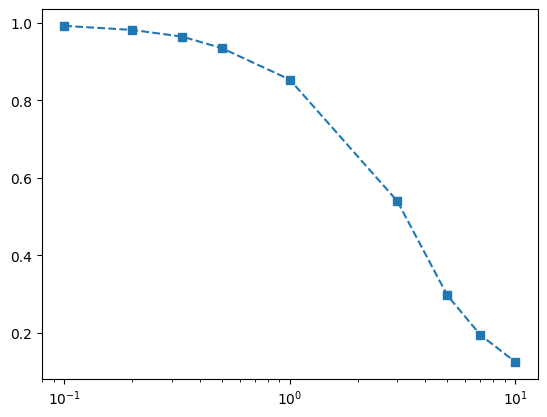

In [5]:
plt.plot(crates, xmaxs, marker="s", ls="--")

plt.xscale("log")
plt.show()

Ahora procedemos a ajustar los datos

In [6]:
dataset = galpynostatic.datasets.load_spherical()
greg = galpynostatic.model.GalvanostaticRegressor(dataset, d, 3)

greg.fit(crates, xmaxs)

In [7]:
greg.dcoeff_

1.2589254117941147e-10

In [8]:
greg.k0_

1.9952623149687604e-07

y el error cuadrático medio entre los resultados de mancini y los valores predichos por el modelo

In [9]:
greg.mse_

0.00018451249950942822

Estos resultados están un orden de magnitud por debajo de los reportados en la información suplementaria del trabajo que publicaron. Sin embargo cabe destacar que en el trabajo de Mancini las capacidades de descargar son a 130 mV debajo del de equilibrio y estoy utilizando una superficie a 150 mV para ajustar, lo cual puede estar provocando este "desplazamiento" de las constantes.

Grafiquemos para ver como dio el ajuste.

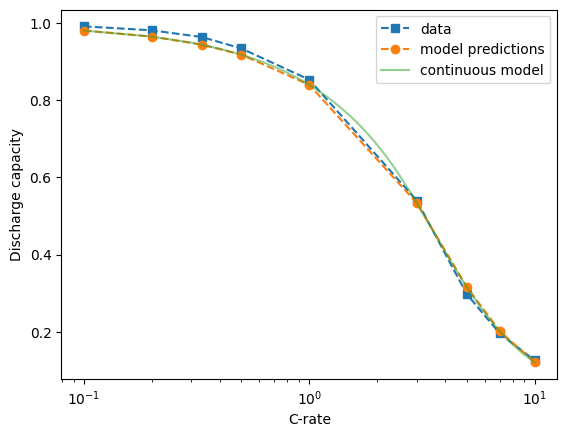

In [10]:
greg.plot_vs_data(crates, xmaxs)

x = np.linspace(np.min(crates), np.max(crates), num=100).reshape(-1, 1)
plt.plot(x, greg.predict(x), alpha=0.5, label="continuous model")

plt.xscale("log")
plt.xlabel("C-rate")
plt.ylabel("Discharge capacity")
plt.legend()
plt.show()

Por último, vemos en que región de la superficie nos encontramos

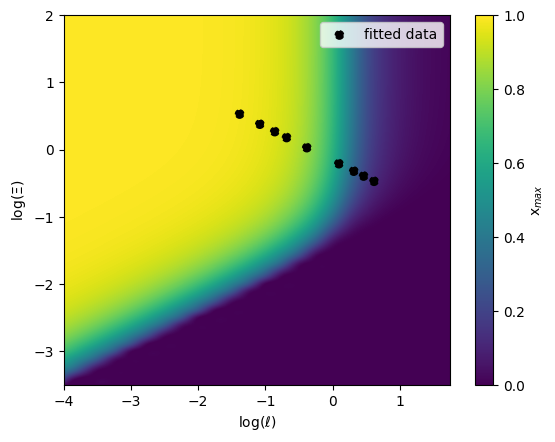

In [11]:
greg.plot_in_surface(crates)
plt.legend()
plt.show()